In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
import seaborn as sns 
import re
 
import warnings # supress warnings
warnings.filterwarnings('ignore')

In [2]:
import sklearn

from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures, scale, StandardScaler

from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet 

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.feature_selection import RFE, SelectKBest, f_regression
from sklearn.inspection import permutation_importance

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, RBF, Matern, RationalQuadratic
from sklearn.gaussian_process.kernels import Kernel, Hyperparameter, ConstantKernel
from sklearn.gaussian_process.kernels import GenericKernelMixin

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score  

from sklearn.pipeline import make_pipeline

from sklearn.base import clone

In [3]:
def run_models():
    rf = RandomForestRegressor(n_estimators= 100, random_state= 10)
    gb = GradientBoostingRegressor(loss='quantile', alpha=0.5,
                                n_estimators=100, max_depth=10,
                                learning_rate=0.25, min_samples_leaf=9,
                                min_samples_split=2)
    lr = LinearRegression()
    rr = Ridge(alpha=0.01)
    lasso = Lasso(alpha=0.01)
    gpr1 = GaussianProcessRegressor(kernel=DotProduct() + WhiteKernel(),random_state=0)
    gpr2 = GaussianProcessRegressor(kernel=1.0 * RBF(length_scale=100.0, length_scale_bounds=(1e-2, 1e3))+ 
                                WhiteKernel(noise_level=1, noise_level_bounds=(1e-10, 1e+1)),alpha=0.0)
    gpr3 = GaussianProcessRegressor(kernel=ConstantKernel(1.0, (1e-2, 1e3)) * RBF(10, (1e-3, 1e4)),
                                n_restarts_optimizer=9)
    gpr4 = GaussianProcessRegressor(kernel=1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-1, 10.0)))
    gpr5 = GaussianProcessRegressor(kernel=1.0 * RationalQuadratic(length_scale=1.0, alpha=0.01))
    gpr6 = GaussianProcessRegressor(kernel=1.0 * Matern(length_scale=1.0, length_scale_bounds=(1e-2, 10.0),nu=0.35))
    models = [rf,gb,lr,rr,lasso,gpr1,gpr2,gpr3,gpr4,gpr5,gpr6]
    models_names = ["RF","GB","LR","RR","LASSO","gpr1","gpr2","gpr3","gpr4","gpr5","gpr6"]
    r2scores=[]
    rmse=[]
    count=0
    for model in models :
        predicted_y = []
        expected_y = []
        kf = KFold(n_splits= 10) 
        # partition data
        for train_index, test_index in kf.split(X, Y):
            # specific ".loc" syntax for working with dataframes
            x_train, x_test = X.loc[train_index], X.loc[test_index]
            y_train, y_test = Y[train_index], Y[test_index]

            # create and fit classifier
            model.fit(x_train, y_train)

            # store result from classification
            predicted_y.extend(model.predict(x_test))

            # store expected result for this specific fold
            expected_y.extend(y_test)
        
        r2 = metrics.r2_score(expected_y, predicted_y)
        r2scores.append(r2)
        
        err=np.sqrt(metrics.mean_squared_error(expected_y, predicted_y))
        rmse.append(err)
        
        print(models_names[count])
        print("R2: ",r2.__str__())
        print("RMSE: ",err)
        print("---------------------------------------")
        count+=1
    
    plt.rcdefaults()
    fig, ax = plt.subplots()

    x_pos = np.arange(len(models_names))
    ax.bar(x_pos, r2scores, align='center')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(models_names)
    ax.set_ylabel('R2 Score')
    #plt.savefig('imp.eps', format='eps')
    #plt.show()
    print(r2scores)

# Standard Scaling

In [4]:
data_std = pd.read_csv('scaled_standard_Coeff_C.csv', encoding='cp1252')   

In [5]:
data_std.columns.values

array(['Name', 'density', 'mean_A2B', 'mean_A2X', 'mean_B2X', 'mean_X2X',
       'std_A2B', 'std_A2X', 'std_B2X', 'std_X2X', 'E_coh', 'TF', 'OF',
       'A_Z', 'B_Z', 'X_Z', 'A_G', 'B_G', 'X_G', 'A_IEI', 'B_IEI',
       'X_IEI', 'A_IEII', 'B_IEII', 'X_IEII', 'A_EA', 'B_EA', 'X_EA',
       'A_ChiP', 'B_ChiP', 'X_ChiP', 'A_ChiA', 'B_ChiA', 'A_Rvdw',
       'B_Rvdw', 'X_Rvdw', 'B_Rc', 'B_Ra', 'A_MP', 'B_MP', 'A_Rho',
       'B_Rho', 'X_Rho', 'B_MV', 'X_MV', 'B_Hf', 'A_Kappa', 'B_Kappa',
       'X_Kappa', 'A_CvM', 'B_CvM', 'A_B', 'B_B', 'B_MendeleevNo',
       'Coeff_C'], dtype=object)

In [6]:
data_std.fillna(0, inplace= True)

In [7]:
Y = data_std['Coeff_C'] 
X = data_std.drop(['Coeff_C','Name'], axis=1)

### Using CV technique

RF
R2:  0.910584610712601
RMSE:  0.29902406138536575
---------------------------------------
GB
R2:  0.8829944185898897
RMSE:  0.3420607861332695
---------------------------------------
LR
R2:  0.1544816320859056
RMSE:  0.9195207272890016
---------------------------------------
RR
R2:  0.6137255169681429
RMSE:  0.6215098414601792
---------------------------------------
LASSO
R2:  0.941662027543342
RMSE:  0.24153254947658287
---------------------------------------
gpr1
R2:  0.8566976903304696
RMSE:  0.3785529152833596
---------------------------------------
gpr2
R2:  0.9383194819186278
RMSE:  0.2483556282458125
---------------------------------------
gpr3
R2:  0.9363754469981249
RMSE:  0.2522390790537325
---------------------------------------
gpr4
R2:  0.9381657309101507
RMSE:  0.24866497358866083
---------------------------------------
gpr5
R2:  0.9384113345475668
RMSE:  0.24817063777254803
---------------------------------------
gpr6
R2:  0.9075708600298269
RMSE:  0.30402161102489594

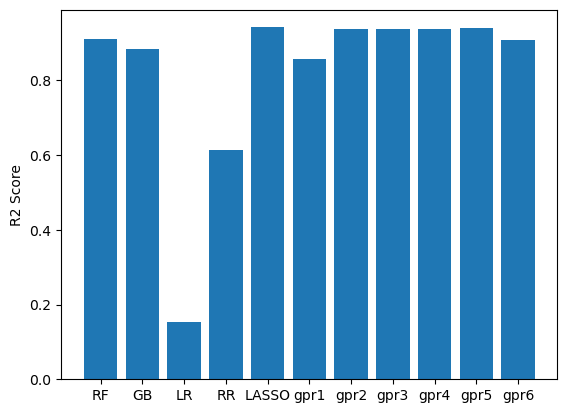

In [8]:
run_models()

## Feature selection


In [9]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=f_regression, k=10)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  #naming the dataframe columns
print(featureScores.nlargest(30,'Score'))  #print 10 best features

     Feature       Score
1   mean_A2B  368.385508
23    X_IEII  203.126963
14       X_Z  192.050449
4   mean_X2X  150.127121
2   mean_A2X   99.679846
34    X_Rvdw   70.210147
32    A_Rvdw   48.519931
9      E_coh   44.870201
26      X_EA   41.399538
47   X_Kappa   36.035444
18     A_IEI   29.198819
30    A_ChiA   25.074064
20     X_IEI   22.200166
46   B_Kappa   19.185480
43      X_MV   17.753147
6    std_A2X   17.303038
25      B_EA   14.125248
12       A_Z   13.564614
27    A_ChiP   12.686824
29    X_ChiP   12.304828
37      A_MP   10.884241
7    std_B2X   10.212695
38      B_MP    9.520593
45   A_Kappa    8.983803
13       B_Z    8.916444
48     A_CvM    8.776297
44      B_Hf    8.513339
28    B_ChiP    7.290453
50       A_B    5.706843
40     B_Rho    5.638959


In [10]:
featureScores.nlargest(40,'Score')['Feature'].values

array(['mean_A2B', 'X_IEII', 'X_Z', 'mean_X2X', 'mean_A2X', 'X_Rvdw',
       'A_Rvdw', 'E_coh', 'X_EA', 'X_Kappa', 'A_IEI', 'A_ChiA', 'X_IEI',
       'B_Kappa', 'X_MV', 'std_A2X', 'B_EA', 'A_Z', 'A_ChiP', 'X_ChiP',
       'A_MP', 'std_B2X', 'B_MP', 'A_Kappa', 'B_Z', 'A_CvM', 'B_Hf',
       'B_ChiP', 'A_B', 'B_Rho', 'A_EA', 'B_IEI', 'OF', 'B_MV', 'density',
       'B_Ra', 'A_G', 'std_A2B', 'X_Rho', 'TF'], dtype=object)

In [11]:
X=X[featureScores.nlargest(40,'Score')['Feature'].values]

RF
R2:  0.9077802279863093
RMSE:  0.30367708509811986
---------------------------------------
GB
R2:  0.8938672687481884
RMSE:  0.3257801885502118
---------------------------------------
LR
R2:  0.21824744805111285
RMSE:  0.8841677170926833
---------------------------------------
RR
R2:  0.8178547803479345
RMSE:  0.42678474627388635
---------------------------------------
LASSO
R2:  0.9405639091794201
RMSE:  0.2437951821110906
---------------------------------------
gpr1
R2:  0.878341197115898
RMSE:  0.34879621971016544
---------------------------------------
gpr2
R2:  0.9495388281627456
RMSE:  0.22463564240176662
---------------------------------------
gpr3
R2:  0.9475006814822903
RMSE:  0.22912729762668985
---------------------------------------
gpr4
R2:  0.9490451437387878
RMSE:  0.2257318237670803
---------------------------------------
gpr5
R2:  0.9461351836842415
RMSE:  0.23208794952723943
---------------------------------------
gpr6
R2:  0.9207951271710726
RMSE:  0.2814336028780

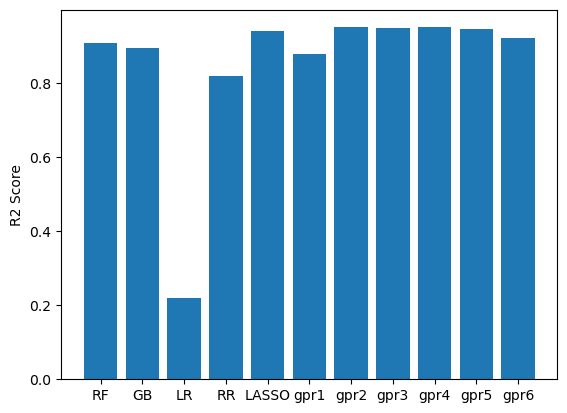

In [12]:
run_models()

In [13]:
featureScores.nlargest(30,'Score')['Feature'].values

array(['mean_A2B', 'X_IEII', 'X_Z', 'mean_X2X', 'mean_A2X', 'X_Rvdw',
       'A_Rvdw', 'E_coh', 'X_EA', 'X_Kappa', 'A_IEI', 'A_ChiA', 'X_IEI',
       'B_Kappa', 'X_MV', 'std_A2X', 'B_EA', 'A_Z', 'A_ChiP', 'X_ChiP',
       'A_MP', 'std_B2X', 'B_MP', 'A_Kappa', 'B_Z', 'A_CvM', 'B_Hf',
       'B_ChiP', 'A_B', 'B_Rho'], dtype=object)

In [14]:
X=X[featureScores.nlargest(30,'Score')['Feature'].values]

RF
R2:  0.9115105787740058
RMSE:  0.2974717150016018
---------------------------------------
GB
R2:  0.8947577219017641
RMSE:  0.3244106627381967
---------------------------------------
LR
R2:  0.8387857817895915
RMSE:  0.40151490409498936
---------------------------------------
RR
R2:  0.8469013169401209
RMSE:  0.39127826806491456
---------------------------------------
LASSO
R2:  0.9339513716883944
RMSE:  0.25699927686981067
---------------------------------------
gpr1
R2:  0.8634927197605938
RMSE:  0.3694689164725582
---------------------------------------
gpr2
R2:  0.947768724098519
RMSE:  0.22854162837759118
---------------------------------------
gpr3
R2:  0.9463901057529835
RMSE:  0.2315381053887597
---------------------------------------
gpr4
R2:  0.9463901060571345
RMSE:  0.23153810473195457
---------------------------------------
gpr5
R2:  0.9477531633644989
RMSE:  0.22857566938653195
---------------------------------------
gpr6
R2:  0.9248510596682648
RMSE:  0.27413307048171

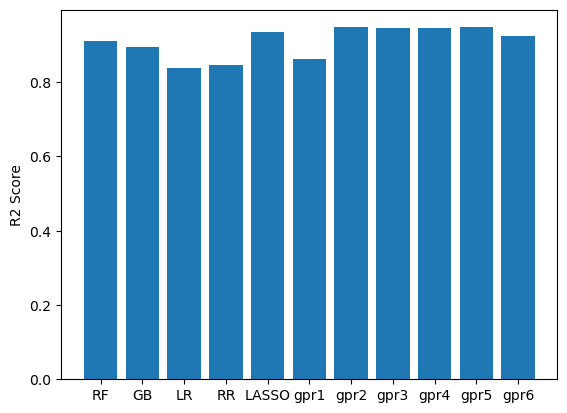

In [15]:
run_models()

In [16]:
featureScores.nlargest(20,'Score')['Feature'].values

array(['mean_A2B', 'X_IEII', 'X_Z', 'mean_X2X', 'mean_A2X', 'X_Rvdw',
       'A_Rvdw', 'E_coh', 'X_EA', 'X_Kappa', 'A_IEI', 'A_ChiA', 'X_IEI',
       'B_Kappa', 'X_MV', 'std_A2X', 'B_EA', 'A_Z', 'A_ChiP', 'X_ChiP'],
      dtype=object)

In [17]:
X=X[featureScores.nlargest(20,'Score')['Feature'].values]

RF
R2:  0.908787931195312
RMSE:  0.30201335865270607
---------------------------------------
GB
R2:  0.9019363652199406
RMSE:  0.3131511372804822
---------------------------------------
LR
R2:  0.8732542812967681
RMSE:  0.3560136496024161
---------------------------------------
RR
R2:  0.8742367477290636
RMSE:  0.35463114960608916
---------------------------------------
LASSO
R2:  0.9208001200151614
RMSE:  0.2814247323616717
---------------------------------------
gpr1
R2:  0.8891754870644356
RMSE:  0.33290315849442514
---------------------------------------
gpr2
R2:  0.9297078697614815
RMSE:  0.265126630572107
---------------------------------------
gpr3
R2:  0.9168992982932901
RMSE:  0.2882719232022257
---------------------------------------
gpr4
R2:  0.9168993160312412
RMSE:  0.28827189243621854
---------------------------------------
gpr5
R2:  0.9320000224051073
RMSE:  0.2607680532482703
---------------------------------------
gpr6
R2:  0.9116743056489318
RMSE:  0.29719639020531224

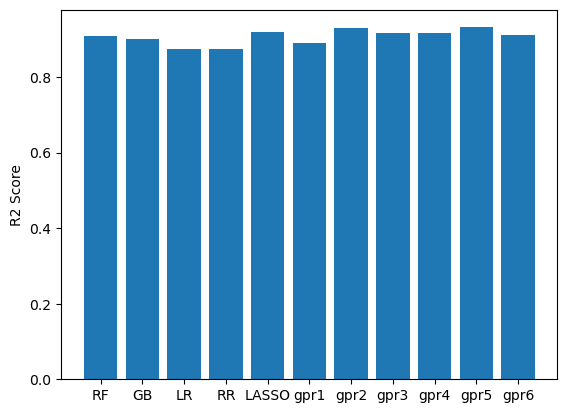

In [18]:
run_models()

In [19]:
featureScores.nlargest(10,'Score')['Feature'].values

array(['mean_A2B', 'X_IEII', 'X_Z', 'mean_X2X', 'mean_A2X', 'X_Rvdw',
       'A_Rvdw', 'E_coh', 'X_EA', 'X_Kappa'], dtype=object)

In [20]:
X=X[featureScores.nlargest(10,'Score')['Feature'].values]

RF
R2:  0.8963218474467453
RMSE:  0.32199091998572676
---------------------------------------
GB
R2:  0.8479835999565719
RMSE:  0.3898928058369738
---------------------------------------
LR
R2:  0.816232277488449
RMSE:  0.4286813764458996
---------------------------------------
RR
R2:  0.8163353338148727
RMSE:  0.42856115804529854
---------------------------------------
LASSO
R2:  0.8240051376876709
RMSE:  0.41951741598213665
---------------------------------------
gpr1
R2:  0.835595834634839
RMSE:  0.4054678351795134
---------------------------------------
gpr2
R2:  0.8787442274865489
RMSE:  0.3482179956772067
---------------------------------------
gpr3
R2:  0.7887156792841603
RMSE:  0.4596567422717084
---------------------------------------
gpr4
R2:  0.78871570006092
RMSE:  0.4596567196714088
---------------------------------------
gpr5
R2:  0.8868430366648251
RMSE:  0.33638811414075687
---------------------------------------
gpr6
R2:  0.8849473451987023
RMSE:  0.3391941255406669
--

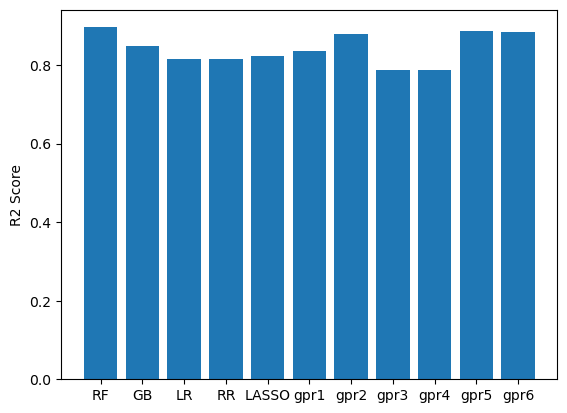

In [21]:
run_models()

# Min-Max scaling

In [22]:
data_mm = pd.read_csv('scaled_minmax_Coeff_C.csv', encoding='cp1252')

In [23]:
data_mm.fillna(0, inplace= True)

In [24]:
Y = data_mm['Coeff_C'] 
X = data_mm.drop(['Coeff_C','Name'], axis=1)

### Using CV technique

RF
R2:  0.9096453450275059
RMSE:  0.07312148096273739
---------------------------------------
GB
R2:  0.9076664766519726
RMSE:  0.07391786541046257
---------------------------------------
LR
R2:  0.633408885163877
RMSE:  0.1472857329074798
---------------------------------------
RR
R2:  0.9397433602603114
RMSE:  0.059713450522010623
---------------------------------------
LASSO
R2:  0.7951592630192701
RMSE:  0.11009760652444422
---------------------------------------
gpr1
R2:  0.7683436937669323
RMSE:  0.11708244321008399
---------------------------------------
gpr2
R2:  0.9512360317760197
RMSE:  0.05371792551099134
---------------------------------------
gpr3
R2:  0.9415602963634526
RMSE:  0.05880628106234004
---------------------------------------
gpr4
R2:  0.9415602789448333
RMSE:  0.05880628982628034
---------------------------------------
gpr5
R2:  0.9458017035539357
RMSE:  0.05663208235636685
---------------------------------------
gpr6
R2:  0.9261584915609834
RMSE:  0.0661028208

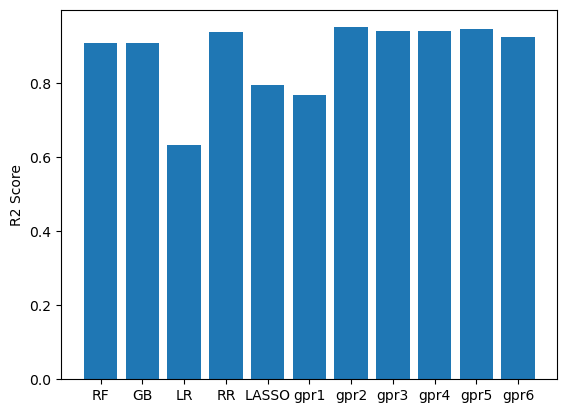

In [25]:
run_models()

## Feature selection


In [26]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=f_regression, k=10)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  #naming the dataframe columns
print(featureScores.nlargest(30,'Score'))  #print 10 best features

     Feature       Score
1   mean_A2B  368.385508
14       X_Z  192.050449
4   mean_X2X  150.127121
2   mean_A2X   99.679846
23    X_IEII   70.574654
34    X_Rvdw   70.210147
32    A_Rvdw   48.519931
9      E_coh   44.870201
26      X_EA   41.399538
47   X_Kappa   36.035444
18     A_IEI   29.198819
41     X_Rho   26.477661
30    A_ChiA   23.955108
20     X_IEI   22.200166
46   B_Kappa   19.185480
43      X_MV   17.753147
6    std_A2X   17.303038
25      B_EA   14.125248
12       A_Z   13.564614
27    A_ChiP   12.686824
29    X_ChiP   12.304828
37      A_MP   10.884241
7    std_B2X   10.212695
38      B_MP    9.520593
45   A_Kappa    8.983803
13       B_Z    8.916444
48     A_CvM    8.776297
44      B_Hf    8.513339
28    B_ChiP    7.290453
50       A_B    5.706843


In [27]:
featureScores.nlargest(40,'Score')['Feature'].values

array(['mean_A2B', 'X_Z', 'mean_X2X', 'mean_A2X', 'X_IEII', 'X_Rvdw',
       'A_Rvdw', 'E_coh', 'X_EA', 'X_Kappa', 'A_IEI', 'X_Rho', 'A_ChiA',
       'X_IEI', 'B_Kappa', 'X_MV', 'std_A2X', 'B_EA', 'A_Z', 'A_ChiP',
       'X_ChiP', 'A_MP', 'std_B2X', 'B_MP', 'A_Kappa', 'B_Z', 'A_CvM',
       'B_Hf', 'B_ChiP', 'A_B', 'A_EA', 'B_ChiA', 'B_IEI', 'OF', 'B_MV',
       'B_Rho', 'density', 'B_Ra', 'A_G', 'std_A2B'], dtype=object)

In [28]:
X=X[featureScores.nlargest(40,'Score')['Feature'].values]

RF
R2:  0.9088625829039474
RMSE:  0.07343753162022323
---------------------------------------
GB
R2:  0.9022111302552411
RMSE:  0.07607017688593497
---------------------------------------
LR
R2:  0.5902939829752829
RMSE:  0.15570619211986128
---------------------------------------
RR
R2:  0.958152790560441
RMSE:  0.04976258863580285
---------------------------------------
LASSO
R2:  0.7951729075560567
RMSE:  0.11009393963698474
---------------------------------------
gpr1
R2:  0.6733696035898799
RMSE:  0.13902663519638236
---------------------------------------
gpr2
R2:  0.9599899113308448
RMSE:  0.048658024168695246
---------------------------------------
gpr3
R2:  0.9467364068393624
RMSE:  0.0561416203674295
---------------------------------------
gpr4
R2:  0.946736395093136
RMSE:  0.05614162655788821
---------------------------------------
gpr5
R2:  0.9521442102530019
RMSE:  0.053215354141409085
---------------------------------------
gpr6
R2:  0.9362208258342294
RMSE:  0.0614340516

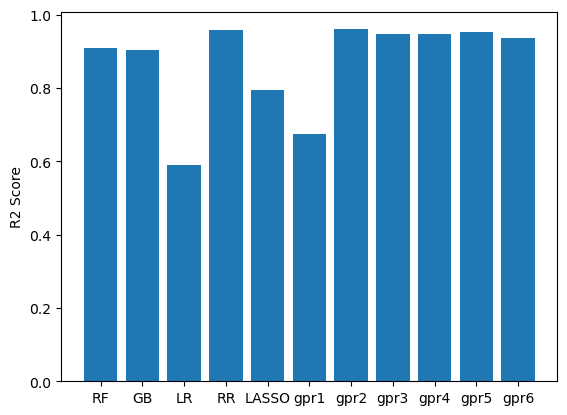

In [29]:
run_models()

In [30]:
featureScores.nlargest(30,'Score')['Feature'].values

array(['mean_A2B', 'X_Z', 'mean_X2X', 'mean_A2X', 'X_IEII', 'X_Rvdw',
       'A_Rvdw', 'E_coh', 'X_EA', 'X_Kappa', 'A_IEI', 'X_Rho', 'A_ChiA',
       'X_IEI', 'B_Kappa', 'X_MV', 'std_A2X', 'B_EA', 'A_Z', 'A_ChiP',
       'X_ChiP', 'A_MP', 'std_B2X', 'B_MP', 'A_Kappa', 'B_Z', 'A_CvM',
       'B_Hf', 'B_ChiP', 'A_B'], dtype=object)

In [31]:
X=X[featureScores.nlargest(30,'Score')['Feature'].values]

RF
R2:  0.911858838553522
RMSE:  0.07222026827140196
---------------------------------------
GB
R2:  0.8904962671571814
RMSE:  0.0804978303153269
---------------------------------------
LR
R2:  0.7925068280091461
RMSE:  0.11080812796473222
---------------------------------------
RR
R2:  0.888767110850532
RMSE:  0.08113090522739103
---------------------------------------
LASSO
R2:  0.7951729017919925
RMSE:  0.11009394118606822
---------------------------------------
gpr1
R2:  0.7982251919791855
RMSE:  0.10927056388611728
---------------------------------------
gpr2
R2:  0.9467822844066647
RMSE:  0.05611743690859181
---------------------------------------
gpr3
R2:  0.9372220310859821
RMSE:  0.06094994852616643
---------------------------------------
gpr4
R2:  0.9372220208482405
RMSE:  0.06094995349598158
---------------------------------------
gpr5
R2:  0.9510251164973459
RMSE:  0.05383397130187311
---------------------------------------
gpr6
R2:  0.9387180855118492
RMSE:  0.060219323878

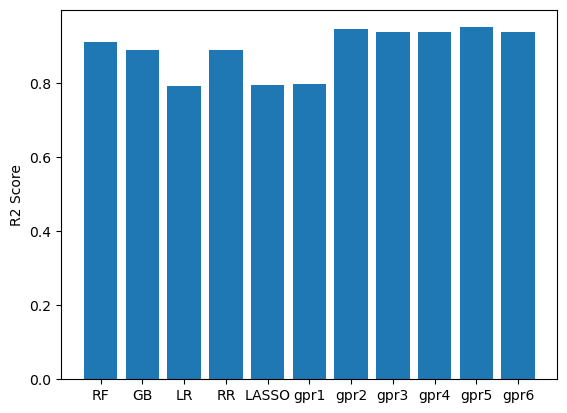

In [32]:
run_models()

In [33]:
featureScores.nlargest(20,'Score')['Feature'].values

array(['mean_A2B', 'X_Z', 'mean_X2X', 'mean_A2X', 'X_IEII', 'X_Rvdw',
       'A_Rvdw', 'E_coh', 'X_EA', 'X_Kappa', 'A_IEI', 'X_Rho', 'A_ChiA',
       'X_IEI', 'B_Kappa', 'X_MV', 'std_A2X', 'B_EA', 'A_Z', 'A_ChiP'],
      dtype=object)

In [34]:
X=X[featureScores.nlargest(20,'Score')['Feature'].values]

RF
R2:  0.909921855568421
RMSE:  0.07300950912897956
---------------------------------------
GB
R2:  0.8931368938468652
RMSE:  0.07952132534147706
---------------------------------------
LR
R2:  0.8739672884322403
RMSE:  0.08635974532171939
---------------------------------------
RR
R2:  0.8864795749672971
RMSE:  0.08196089970338859
---------------------------------------
LASSO
R2:  0.7962279772476815
RMSE:  0.10981002517601676
---------------------------------------
gpr1
R2:  0.8769806148834967
RMSE:  0.08532110842791847
---------------------------------------
gpr2
R2:  0.9267806077504465
RMSE:  0.06582377306332152
---------------------------------------
gpr3
R2:  0.876854350674175
RMSE:  0.08536488299000236
---------------------------------------
gpr4
R2:  0.87685440025351
RMSE:  0.08536486580573896
---------------------------------------
gpr5
R2:  0.9389872818897598
RMSE:  0.06008691396829628
---------------------------------------
gpr6
R2:  0.9243534429012276
RMSE:  0.0669058813825

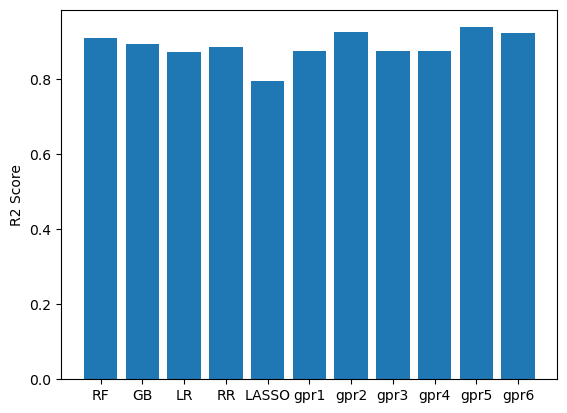

In [35]:
run_models()

In [36]:
featureScores.nlargest(10,'Score')['Feature'].values

array(['mean_A2B', 'X_Z', 'mean_X2X', 'mean_A2X', 'X_IEII', 'X_Rvdw',
       'A_Rvdw', 'E_coh', 'X_EA', 'X_Kappa'], dtype=object)

In [37]:
X=X[featureScores.nlargest(10,'Score')['Feature'].values]

RF
R2:  0.8907609814351936
RMSE:  0.08040047373160232
---------------------------------------
GB
R2:  0.8647758550852402
RMSE:  0.08945339642513553
---------------------------------------
LR
R2:  0.8149217617619757
RMSE:  0.10465196595437759
---------------------------------------
RR
R2:  0.8197551005763024
RMSE:  0.10327642708006395
---------------------------------------
LASSO
R2:  0.7799801858347661
RMSE:  0.11410393179954838
---------------------------------------
gpr1
R2:  0.8198233341256249
RMSE:  0.10325687705603981
---------------------------------------
gpr2
R2:  0.8783593460311118
RMSE:  0.08484164608232339
---------------------------------------
gpr3
R2:  0.48693450625044343
RMSE:  0.1742433115610644
---------------------------------------
gpr4
R2:  0.48693450351521583
RMSE:  0.17424331202552276
---------------------------------------
gpr5
R2:  0.8853338266660274
RMSE:  0.08237347216714017
---------------------------------------
gpr6
R2:  0.8892798227465746
RMSE:  0.08094370

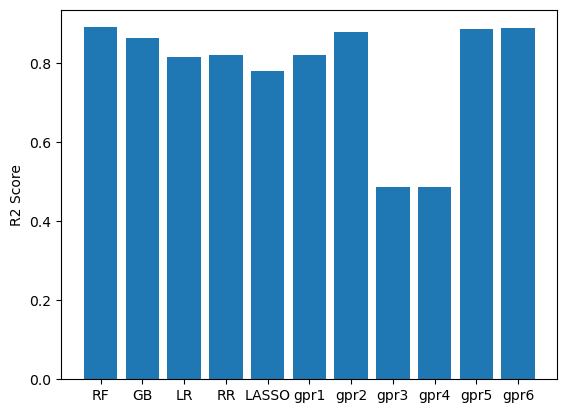

In [38]:
run_models()